In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
function = 'schaffers' #'bentcigar' or 'katsuura' or 'schaffers'
islands = ['1', '2', '3']

averages = dict()
champions = dict()

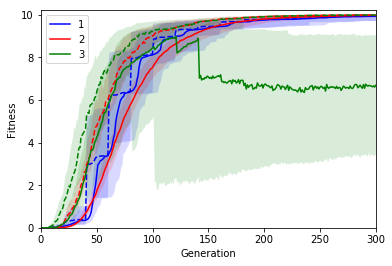

In [21]:
for island in islands:
    averages[island] = np.loadtxt('results/averages_%s_%s.txt' % (function, island), dtype=float)
    champions[island] = np.loadtxt('results/champions_%s_%s.txt' % (function, island), dtype=float)

for island in islands:
    G = len(champions[island])

    champion_median = np.zeros((G))
    champion_firstquartile = np.zeros((G))
    champion_thirdquartile = np.zeros((G))
    average_median = np.zeros((G))
    average_firstquartile = np.zeros((G))
    average_thirdquartile = np.zeros((G))
    for t in range(0, G):
        champion_median[t] = np.median(champions[island][t, :])
        champion_firstquartile[t] = np.percentile(champions[island][t, :], 25)
        champion_thirdquartile[t] = np.percentile(champions[island][t, :], 75)
        average_median[t] = np.median(averages[island][t, :])
        average_firstquartile[t] = np.percentile(averages[island][t, :], 25)
        average_thirdquartile[t] = np.percentile(averages[island][t, :], 75)
    if island == '1':
        color = 'blue'
    if island == '2':
        color = 'red'
    if island == '3':
        color = 'green'
    plt.plot(range(0,G), average_median, color=color, label=island)
    plt.fill_between(range(0, G), average_thirdquartile, average_firstquartile, color=color, alpha=0.15, linewidth=0)
    plt.plot(range(0,G), champion_median, color=color, linestyle='--')
    plt.fill_between(range(0, G), champion_firstquartile, champion_thirdquartile, color=color, alpha=0.15, linewidth=0)


plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=10.2)
plt.legend()
plt.savefig('%s.png' % function, bbox_inches='tight')
plt.show()

